## ML - Clustering K-Means

### Clustering
Clustering is an unsupervised machine learning method that is used when you do not have labels for your data. The goal of clustering algorithms is to segment similar data points into groups; to extract meaning from the data.

### Introduction to K-Means Algorithm
K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

### Working of K-Means Algorithm

1. First, we need to specify the number of clusters, K, need to be generated by this algorithm.
2. Next, randomly select K data points and assign each data point to a cluster. In simple words, classify the data based on the number of data points.
3. Next, keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters that are not changing any more
    1. First, the sum of squared distance between data points and centroids would be computed.
    2. Now, we have to assign each data point to the cluster that is closer than other cluster (centroid).
    3. At last compute the centroids for the clusters by taking the average of all data points of that cluster.

### Python Implementation

#### Import Modules

In [31]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#### Centroid Initialization

In [32]:
def centroid_init(X, k):
    ## randomly pick k random indices without replacement
    idx = np.random.choice(len(X), k, replace=False)
    ## select points with those indices
    centroids = X[idx, :]
    return centroids

#### K-means model

#### Find kmeans class for each point and update centroids

In [33]:
def kmeans_class(X, centroids):
    #calculate distance between each point and centroids, result each row shows distance for this point to each centroid
    dist = distance.cdist(X, centroids, 'euclidean')
    ## number of centroids
    k = centroids.shape[0]
    #minimum distance among all clusters centroids and return indices
    clus = np.argmin(dist, axis=1)
    #update new centroids points, mean value along each feature column, centroids does not need to be those of points
    centroids_new = np.array([X[clus==i,:].mean(axis = 0) for i in range(k)])
    return centroids_new, clus

In [34]:
test1 = np.ones((4,4))
test2 = np.full((2,4), 2)
print(test2)
dist = distance.cdist(test1, test2, 'euclidean')
print(dist, dist.shape)

[[2 2 2 2]
 [2 2 2 2]]
[[2. 2.]
 [2. 2.]
 [2. 2.]
 [2. 2.]] (4, 2)


In [35]:
#### Training Model
def kmeans_training(X, k, iterations):
    ## initializa centroids:
    centroids_new = centroid_init(X, k)
    ## training number of iterations times
    for i in range(iterations):
        centroids_old = centroids_new
        centroids_new, clus = kmeans_class(X, centroids_new)
        if np.array_equal(centroids_new, centroids_old):break
    return centroids_new, clus

#### Prepare Data
Data source: https://www.kaggle.com/shrutimechlearn/customer-data

In [36]:
# dataset = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')
dataset = pd.read_csv('Mall_Customers.csv')
dataset = dataset.drop(['CustomerID'],axis=1)
# mapping gender string to int number
dataset['Genre'] = dataset['Genre'].map({'Male': 0,'Female': 1})
# dataset['Genre'] = dataset['Genre'].astype(int)
dataset.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


convert dataframe to numpy array and normalize data

In [37]:
dataset = dataset.to_numpy()
print(dataset.shape)
sc = StandardScaler()
sc.fit(dataset)
dataset = sc.transform(dataset)
print(dataset.shape)

(200, 4)
(200, 4)


#### Cluster Sum of Squares

In [38]:
def wcss(X, centroids, cluster):
    dist = distance.cdist(X, centroids, 'euclidean')
    # print(np.arange(len(X)), np.arange(len(X)).shape)
    # dist = dist[:,cluster]
    #https://stackoverflow.com/questions/23435782/numpy-selecting-specific-column-index-per-row-by-using-a-list-of-indexes
    print(dist[0,:], dist.shape)
    dist_col = dist[np.arange(len(X)), cluster]
    # print(X.shape)
    # print(dist.shape)
    print(cluster[0], dist_col[0])
    return np.sum(dist_col)

#### training model using different number of clusters

[2.5525074] (200, 1)
0 2.5525074007307538
[2.36972607 3.00436969] (200, 2)
0 2.369726068269603
[1.81976996 3.3143282  3.04826821] (200, 3)
0 1.819769959255669
[1.36825118 3.49539002 2.90157935 3.0822788 ] (200, 4)
0 1.3682511792461292
[2.29313133 2.35407924 3.48145412 2.86211694 3.38126397] (200, 5)
0 2.2931313336344648
[2.07908033 3.40061434 3.87904319 3.08606655 3.31008982 2.41263068] (200, 6)
0 2.079080330492588
[2.52281842 1.75681707 3.3911064  3.7162377  2.80155692 3.29029326
 4.07468779] (200, 7)
1 1.7568170655076787
[2.16681713 3.40975474 3.60402493 2.54835422 3.42399165 2.50892073
 3.28895061 2.90126729] (200, 8)
0 2.1668171274506363
[3.40664975 3.52160278 2.41263068 1.38889018 3.82107128 3.13434822
 3.23119302 2.77799583 3.42184942] (200, 9)
3 1.3888901806304603
[2.65072057 2.88184326 3.44161229 2.65339064 3.42841029 3.87972858
 3.64352864 1.35186773 2.49030382 3.3911064 ] (200, 10)
7 1.3518677262714272
[2.85434041 2.54493199 3.37905036 3.64352864 1.35186773 4.07468779
 3.5658

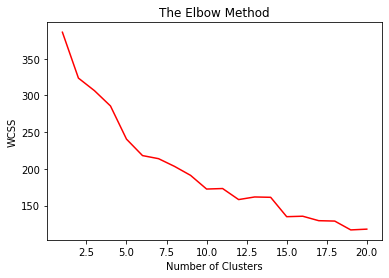

In [39]:
plt_k = []
plt_y = []
for k in range(3):
    centroids, cluster = kmeans_training(dataset, k+1, 100)
    wcss_error = wcss(dataset, centroids,cluster)
    # print(wcss_error)
    plt_k.append(k+1)
    plt_y.append(wcss_error)

plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(plt_k,plt_y,'r')
plt.show()

#### Final plot

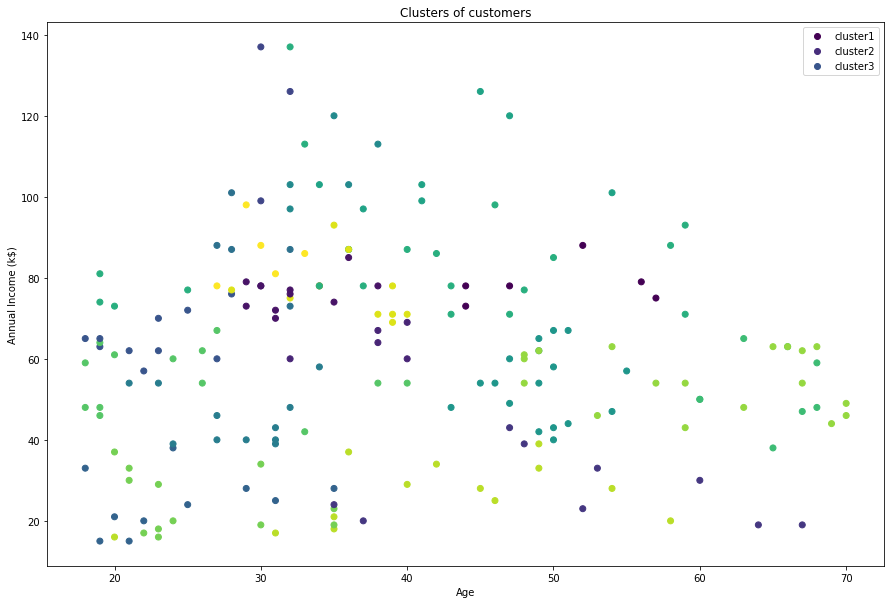

In [40]:
## denormalize data
X = sc.inverse_transform(dataset)
plt.figure(figsize=(15,10))
sca = plt.scatter(X[:,1],X[:,2],c=cluster)
labels = ['cluster1', 'cluster2', 'cluster3']
plt.legend(handles=sca.legend_elements()[0], labels=labels)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

In [41]:
#### plot using seaborn

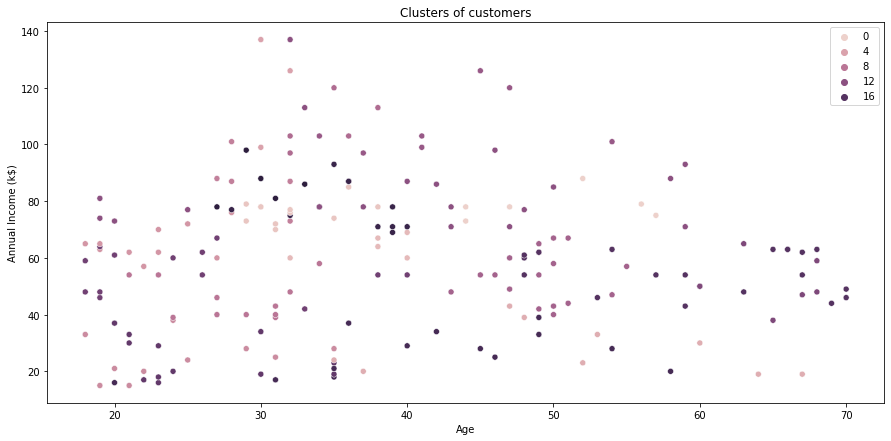

In [42]:
plt.figure(figsize=(15,7))
sns.scatterplot(x= X[:,1], y = X[:,2], hue= cluster)

plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

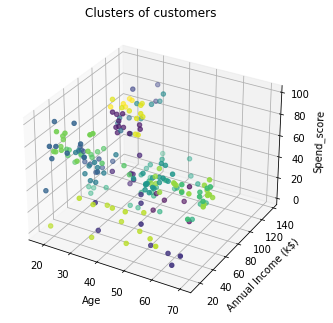

In [43]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,1],X[:,2],X[:,3],c=cluster)
plt.title('Clusters of customers')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spend_score')
plt.show()